In [284]:
from headers import *
from DMP_Segment import *
%matplotlib notebook

In [288]:
# cd ../../Data/Cornell_Data/Primitive_Library/Subject1/

[Errno 2] No such file or directory: '../../Data/Cornell_Data/Primitive_Library/Subject1/'
/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Force_Win_Interp_Seg/LH_Segment_0


In [292]:
# cd ../

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1


In [293]:
num_files = 31
lind = npy.load("LH_Seg_Inds.npy")
lhns = npy.load("LH_Num_Seg_Interp.npy")
lignore = npy.array([9,10,11,29])
rignore = npy.array([0,1,4,6,7,8,12,14,20,22,27,30])

In [294]:
# PARSING TRAJECTORY
pos = npy.load("Traj_0/lh_comp_pos_0.npy")

In [295]:
cd Traj_0/Force_Win_Interp_Seg/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Force_Win_Interp_Seg


In [296]:
num_kernels = 500
start_seq = npy.zeros((lhns[0],3))
goal_seq = npy.zeros((lhns[0],3))
init_vel_seq = npy.zeros((lhns[0],3))
primitive_labels = npy.zeros(lhns[0])
# primitive_weights = npy.zeros((lhns[0],num_kernels,3))

In [297]:
overlap = 0.95
total_time = 975
time_points = npy.array([0,475,975])
roll_pos = npy.zeros((total_time,3))
roll_vel = npy.zeros((total_time,3))
roll_acc = npy.zeros((total_time,3))

In [298]:
primitives = [DMP(500) for i in range(2)]
alphaz = primitives[0].alphaz
betaz = primitives[0].betaz
tau = primitives[0].tau
dt = 1

In [299]:
# cd ..


In [300]:
for j in range(2):
    primitives[j].initialize_variables()
    primitives[j].load_weights(npy.load("LH_Segment_{0}/force_weights.npy".format(j)))
    seg_pos = npy.load("LH_Segment_{0}/demo_pos.npy".format(j))
    start_seq[j,:] = seg_pos[0,:3]
    goal_seq[j,:] = seg_pos[-1,:3]
    
# for j in range(lhns[0]):
#     primitive_sequence[j].initialize_variables()
#     primitive_sequence[j].load_weights(npy.load("LH_Segment_{0}/force_weights.npy".format(j)))
#     seg_pos = npy.load("LH_Segment_{0}/demo_pos.npy".format(j))
#     start_seq[j,:] = seg_pos[0,:3]
#     goal_seq[j,:] = seg_pos[-1,:3]

# Remember, must initialize the initial velocities based on the rollouts.    
# Remember, must initialize the initial velocities based on the rollouts.

In [301]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot(pos[:,0],pos[:,1],pos[:,2])
# ax.scatter(start_seq[:,0],start_seq[:,1],start_seq[:,2])
# plt.show()

In [302]:
def calc_acc(k,t,force):
#     print(force)
    roll_acc[t] = (1./tau**2)*(alphaz*(betaz*(goal_seq[k]-roll_pos[t])-tau*roll_vel[t])+force)
    
def calc_vel(t):
    roll_vel[t] = roll_vel[t-1]+roll_acc[t-1]*dt

def calc_pos(t):
    roll_pos[t] = roll_pos[t-1]+roll_vel[t-1]*dt

<IPython.core.display.Javascript object>


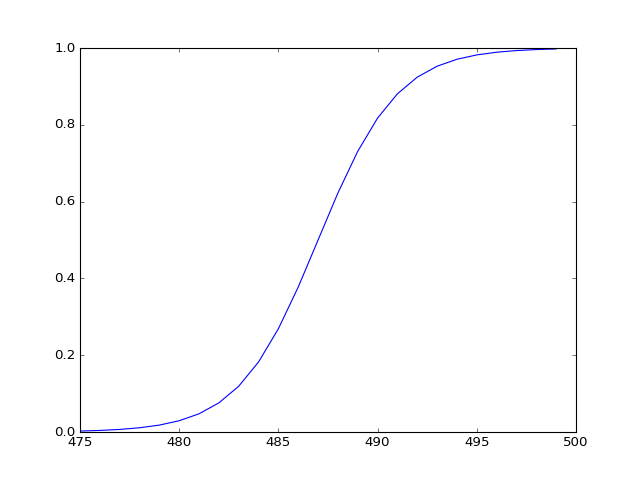

In [320]:
def sigmoid(x):
    return 1./(1.+npy.exp(-x))

def alpha_function(time,T1,W):
    return sigmoid(W*(time-0.974*T1))

tr = npy.linspace(475,500-1,25)
T1 = 500
W = 0.5

alpha = npy.zeros(25)
for t in range(25):
    alpha[t] = alpha_function(tr[t],T1,W)

fig,ax = plt.subplots()
ax.plot(tr,alpha)
plt.show()

In [303]:
cd LH_Segment_0/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Force_Win_Interp_Seg/LH_Segment_0


In [304]:
ivel = npy.load("demo_vel.npy")[:,:3]
iacc = npy.load("demo_acc.npy")[:,:3]
iacc[0]

array([-1.6, -1.9,  1.6])

In [305]:
# ROLLOUT: 
roll_pos[0] = start_seq[0]
roll_vel[0] = ivel[0]

force = primitives[0].calc_rollout_force_time(0,roll_pos[0],goal_seq[0])
calc_acc(0,0,force)

In [310]:
for t in range(1,475):
    force = primitives[0].calc_rollout_force_time(t,roll_pos[0],goal_seq[0])
    calc_vel(t)
    calc_pos(t)
    calc_acc(0,t,force)

<IPython.core.display.Javascript object>


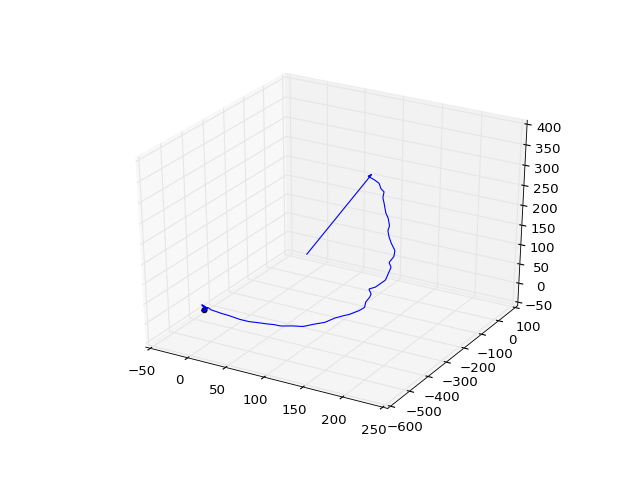

In [311]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(roll_pos[:,0],roll_pos[:,1],roll_pos[:,2])
ax.scatter(roll_pos[:2,0],roll_pos[:2,1],roll_pos[:2,2])
plt.show()

<IPython.core.display.Javascript object>


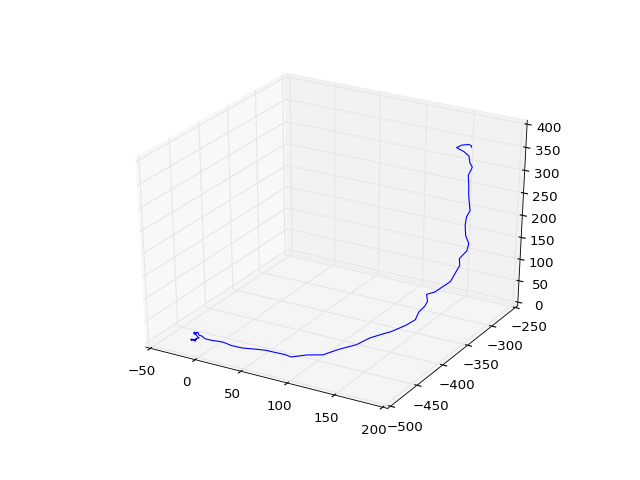

In [317]:
j=0
seg_pos = npy.load("demo_pos.npy".format(j))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(seg_pos[:,0],seg_pos[:,1],seg_pos[:,2])
plt.show()

In [321]:
for t in range(475,500):
    force_1 = primitives[0].calc_rollout_force_time(t-time_points[0],roll_pos[0],goal_seq[0])
    force_2 = primitives[1].calc_rollout_force_time(t-time_points[1],roll_pos[time_points[1]],goal_seq[1])
    
    forcing_term = (1-alpha[t-time_points[1]])*force_1+alpha[t-time_points[1]]*force_2
    calc_vel(t)
    calc_pos(t)
    calc_acc(1,t,forcing_term)
    

<IPython.core.display.Javascript object>


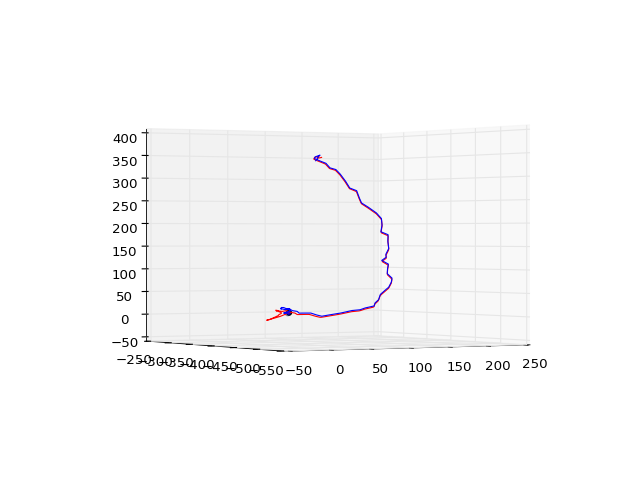

In [326]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(roll_pos[:,0],roll_pos[:,1],roll_pos[:,2])
ax.plot(roll_pos[:500,0],roll_pos[:500,1],roll_pos[:500,2],'r')
# ax.plot(roll_pos[:475,0],roll_pos[:475,1],roll_pos[:475,2],'b')
ax.plot(seg_pos[:,0],seg_pos[:,1],seg_pos[:,2],'b')
ax.scatter(roll_pos[:2,0],roll_pos[:2,1],roll_pos[:2,2])
plt.show()

In [327]:
for t in range(500,975):
    force = primitives[1].calc_rollout_force_time(t-time_points[1],roll_pos[time_points[1]],goal_seq[1])       
    calc_vel(t)
    calc_pos(t)
    calc_acc(1,t,force)


<IPython.core.display.Javascript object>


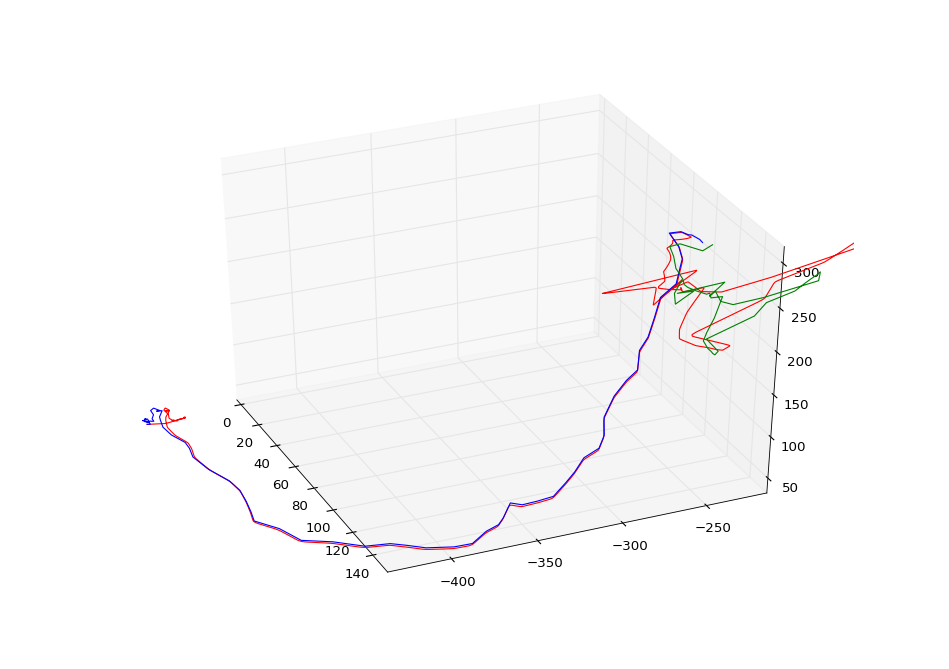

In [335]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(roll_pos[:,0],roll_pos[:,1],roll_pos[:,2],'r')
# ax.plot(roll_pos[:500,0],roll_pos[:500,1],roll_pos[:500,2],'r')
# ax.plot(roll_pos[:475,0],roll_pos[:475,1],roll_pos[:475,2],'b')
ax.plot(seg_pos[:,0],seg_pos[:,1],seg_pos[:,2],'b')
ax.plot(seg_pos_2[:,0],seg_pos_2[:,1],seg_pos_2[:,2],'g')
plt.show()

In [332]:
cd ..

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Force_Win_Interp_Seg


<IPython.core.display.Javascript object>


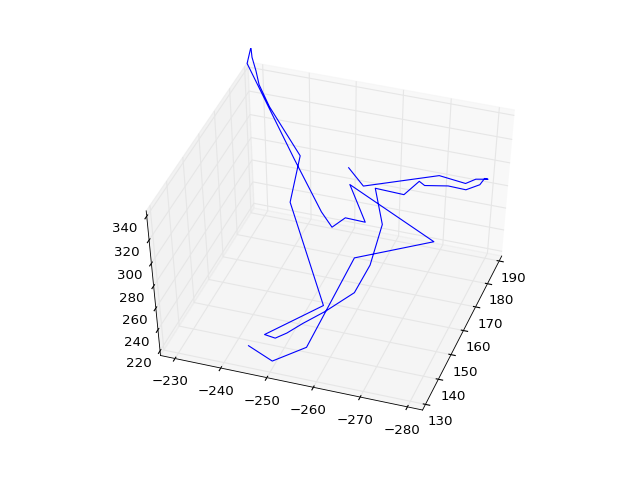

In [333]:
# j=1
# seg_pos_2 = npy.load("LH_Segment_{0}/demo_pos.npy".format(j))
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot(seg_pos_2[:,0],seg_pos_2[:,1],seg_pos_2[:,2])
# plt.show()